In [38]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from datetime import datetime

import joblib

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

In [2]:
data_train = pd.read_csv("F:\\He_is_enough03 X UniqoXTech X Dreams\\Machine Learning\\Credit Card Fraud Detection\\archive\\fraudTrain.csv")
data_test = pd.read_csv("F:\\He_is_enough03 X UniqoXTech X Dreams\\Machine Learning\\Credit Card Fraud Detection\\archive\\fraudTest.csv")

In [3]:
data_train.shape[0]

1296675

In [4]:
data_test.shape[0]

555719

In [5]:
data = pd.concat([data_train,data_test])
data.shape[0]

1852394

In [6]:
data.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


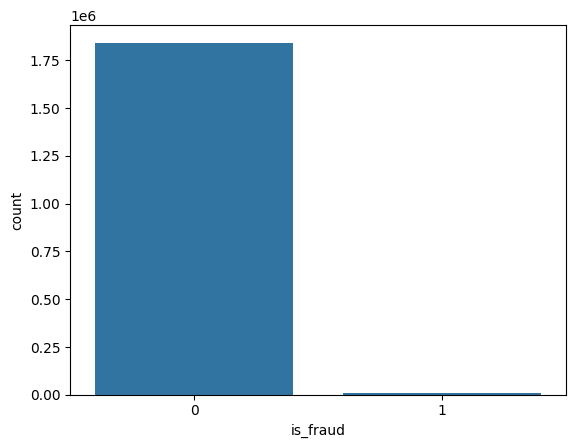

In [7]:
sns.countplot(x=data['is_fraud'])
plt.show()

In [8]:
fraud = data[data["is_fraud"] == 1]
not_fraud =  data[data["is_fraud"] == 0]
print(fraud.shape[0])
print(not_fraud.shape[0])

9651
1842743


In [9]:
not_fraud = not_fraud.sample(fraud.shape[0], random_state = 42)
data_new = pd.concat([fraud, not_fraud])

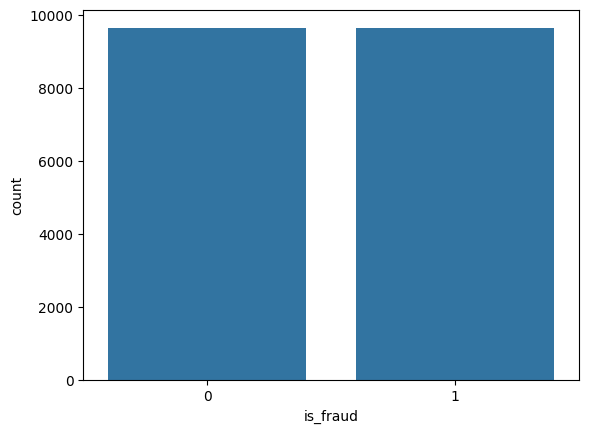

In [10]:
sns.countplot(x=data_new['is_fraud'])
plt.show()

In [11]:
data_new.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19302 entries, 2449 to 135673
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             19302 non-null  int64  
 1   trans_date_trans_time  19302 non-null  object 
 2   cc_num                 19302 non-null  int64  
 3   merchant               19302 non-null  object 
 4   category               19302 non-null  object 
 5   amt                    19302 non-null  float64
 6   first                  19302 non-null  object 
 7   last                   19302 non-null  object 
 8   gender                 19302 non-null  object 
 9   street                 19302 non-null  object 
 10  city                   19302 non-null  object 
 11  state                  19302 non-null  object 
 12  zip                    19302 non-null  int64  
 13  lat                    19302 non-null  float64
 14  long                   19302 non-null  float64
 15  cit

In [13]:
useless_cols = ['Unnamed: 0','merchant','cc_num','first','zip','last','trans_num','unix_time','street',
    'merch_lat','gender','merch_long','job','trans_date_trans_time'
]

data_new.drop(columns=useless_cols, inplace=True)

data_new.head()

,category,amt,city,state,lat,long,city_pop,dob,is_fraud
2449,grocery_pos,281.06,Collettsville,NC,35.9946,-81.7266,885,1988-09-15,1
2472,gas_transport,11.52,San Antonio,TX,29.4400,-98.4590,1595797,1960-10-28,1
2523,grocery_pos,276.31,San Antonio,TX,29.4400,-98.4590,1595797,1960-10-28,1
2546,gas_transport,7.03,Collettsville,NC,35.9946,-81.7266,885,1988-09-15,1
2553,grocery_pos,275.73,San Antonio,TX,29.4400,-98.4590,1595797,1960-10-28,1


In [14]:
data_new.isna().sum().sum()

0

In [15]:
data_new.duplicated().sum()

2

In [17]:
data_new.drop_duplicates()

,category,amt,city,state,lat,long,city_pop,dob,is_fraud
2449,grocery_pos,281.06,Collettsville,NC,35.9946,-81.7266,885,1988-09-15,1
2472,gas_transport,11.52,San Antonio,TX,29.4400,-98.4590,1595797,1960-10-28,1
2523,grocery_pos,276.31,San Antonio,TX,29.4400,-98.4590,1595797,1960-10-28,1
2546,gas_transport,7.03,Collettsville,NC,35.9946,-81.7266,885,1988-09-15,1
2553,grocery_pos,275.73,San Antonio,TX,29.4400,-98.4590,1595797,1960-10-28,1
...,...,...,...,...,...,...,...,...,...
99709,gas_transport,62.58,Johns Island,SC,32.8357,-79.8217,20478,1997-06-04,0
274694,misc_net,273.25,Belfast,NY,42.3200,-78.0943,1766,1962-06-04,0
807093,misc_pos,2.74,Greendale,WI,42.9373,-87.9943,13973,1981-05-06,0
861157,shopping_net,161.28,Westport,KY,38.4921,-85.4524,564,1996-04-10,0


In [18]:
data_new.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19302 entries, 2449 to 135673
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   category  19302 non-null  object 
 1   amt       19302 non-null  float64
 2   city      19302 non-null  object 
 3   state     19302 non-null  object 
 4   lat       19302 non-null  float64
 5   long      19302 non-null  float64
 6   city_pop  19302 non-null  int64  
 7   dob       19302 non-null  object 
 8   is_fraud  19302 non-null  int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 1.5+ MB


In [19]:
data_new["dob"] = pd.to_datetime(data_new["dob"])

In [22]:
data_new["dob"] = data_new["dob"].dt.year
data_new['dob'] = datetime.now().year - data_new['dob']
data_new = data_new.rename(columns = {"dob" : "age"})
data_new.head()

,category,amt,city,state,lat,long,city_pop,age,is_fraud
2449,grocery_pos,281.06,Collettsville,NC,35.9946,-81.7266,885,36,1
2472,gas_transport,11.52,San Antonio,TX,29.4400,-98.4590,1595797,64,1
2523,grocery_pos,276.31,San Antonio,TX,29.4400,-98.4590,1595797,64,1
2546,gas_transport,7.03,Collettsville,NC,35.9946,-81.7266,885,36,1
2553,grocery_pos,275.73,San Antonio,TX,29.4400,-98.4590,1595797,64,1


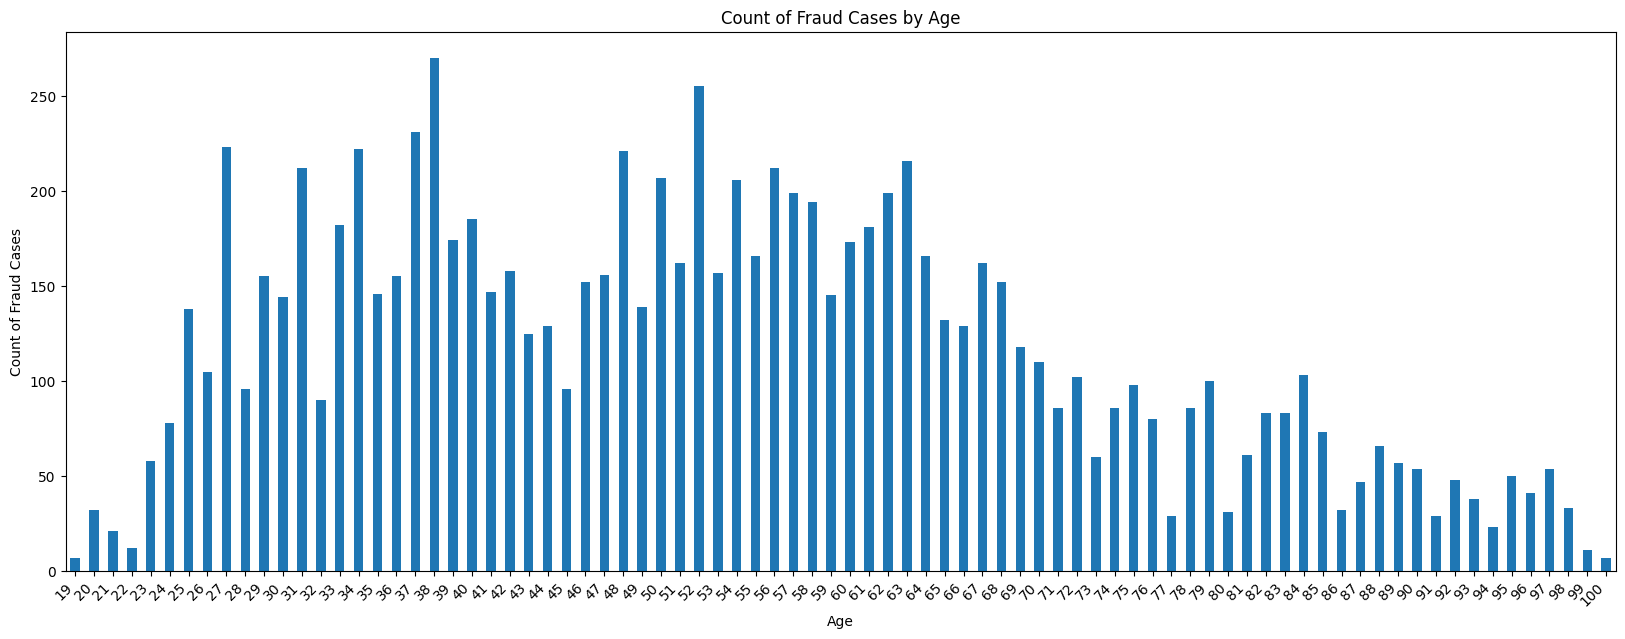

In [23]:
plt.figure(figsize=(20, 7))
ax = data_new[data_new['is_fraud'] == 1].groupby('age').count()['is_fraud'].plot(kind='bar')
ax.set_xlabel('Age')
ax.set_ylabel('Count of Fraud Cases')
ax.set_title('Count of Fraud Cases by Age')
plt.xticks(rotation=45, ha='right')
plt.show()

In [24]:
numeric_columns = [i for i in data_new.columns if data_new[i].dtype == 'int64' or data_new[i].dtype =='int32' or data_new[i].dtype =='float64']
categorical_columns = [i for i in data_new.columns if data_new[i].dtype == 'object']

print(numeric_columns)
print(categorical_columns)

['amt', 'lat', 'long', 'city_pop', 'age', 'is_fraud']
['category', 'city', 'state']


In [26]:
encoder = LabelEncoder()
for col in categorical_columns:
    data_new[col] = encoder.fit_transform(data_new[col])
data_new.head()

,category,amt,city,state,lat,long,city_pop,age,is_fraud
2449,4,281.06,165,27,35.9946,-81.7266,885,36,1
2472,2,11.52,733,43,29.4400,-98.4590,1595797,64,1
2523,4,276.31,733,43,29.4400,-98.4590,1595797,64,1
2546,2,7.03,165,27,35.9946,-81.7266,885,36,1
2553,4,275.73,733,43,29.4400,-98.4590,1595797,64,1


In [27]:
columns = data_new.columns.tolist() 
columns.remove('is_fraud')
X = data_new.drop(['is_fraud'], axis=1)
y = data_new['is_fraud']

scaler = StandardScaler()

X[columns] = scaler.fit_transform(X[columns])
data_new[X.columns] = X
data_new.head()

,category,amt,city,state,lat,long,city_pop,age,is_fraud
2449,-0.709574,-0.048824,-1.077481,0.034310,-0.510595,0.611576,-0.291727,-0.891598,1
2472,-1.225613,-0.766329,1.084657,1.152756,-1.789179,-0.575843,4.991972,0.660956,1
2523,-0.709574,-0.061468,1.084657,1.152756,-1.789179,-0.575843,4.991972,0.660956,1
2546,-1.225613,-0.778281,-1.077481,0.034310,-0.510595,0.611576,-0.291727,-0.891598,1
2553,-0.709574,-0.063012,1.084657,1.152756,-1.789179,-0.575843,4.991972,0.660956,1


In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [31]:
# Initialize the models
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    'SVC': SVC(),
    'KNN': KNeighborsClassifier(),
    'Naive Bayes': GaussianNB(),
    'AdaBoost': AdaBoostClassifier()
}

In [32]:
# Function to evaluate models
def evaluate_model(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    return accuracy, precision, recall, f1

In [33]:
results = {}
for name, model in models.items():
    accuracy, precision, recall, f1 = evaluate_model(model, X_train, y_train, X_test, y_test)
    results[name] = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1
    }
# Create a DataFrame to display the results
results_data = pd.DataFrame(results).T
results_data

C:\Python\Lib\site-packages\xgboost\core.py:158: UserWarning: [07:09:27] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Python\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


,Accuracy,Precision,Recall,F1 Score
Logistic Regression,0.854183,0.939511,0.756869,0.838358
Decision Tree,0.951826,0.954143,0.949196,0.951663
Random Forest,0.953639,0.967914,0.938310,0.952882
Gradient Boosting,0.946905,0.951309,0.941939,0.946601
XGBoost,0.960114,0.953037,0.967859,0.960391
SVC,0.864284,0.969900,0.751685,0.846963
KNN,0.840974,0.885630,0.782789,0.831040
Naive Bayes,0.800570,0.963971,0.624158,0.757709
AdaBoost,0.915048,0.926933,0.900985,0.913775


In [34]:
# Initialize the XGBoost model
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
# Train the model on the training data
xgb_model.fit(X_train, y_train)

C:\Python\Lib\site-packages\xgboost\core.py:158: UserWarning: [07:10:36] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)

In [35]:
from sklearn.metrics import confusion_matrix, classification_report
# Print confusion matrix and classification report
y_pred = xgb_model.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(conf_matrix)
print('\nClassification Report:')
print(classification_report(y_test, y_pred))

Confusion Matrix:
[[1840   92]
 [  62 1867]]

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.95      0.96      1932
           1       0.95      0.97      0.96      1929

    accuracy                           0.96      3861
   macro avg       0.96      0.96      0.96      3861
weighted avg       0.96      0.96      0.96      3861



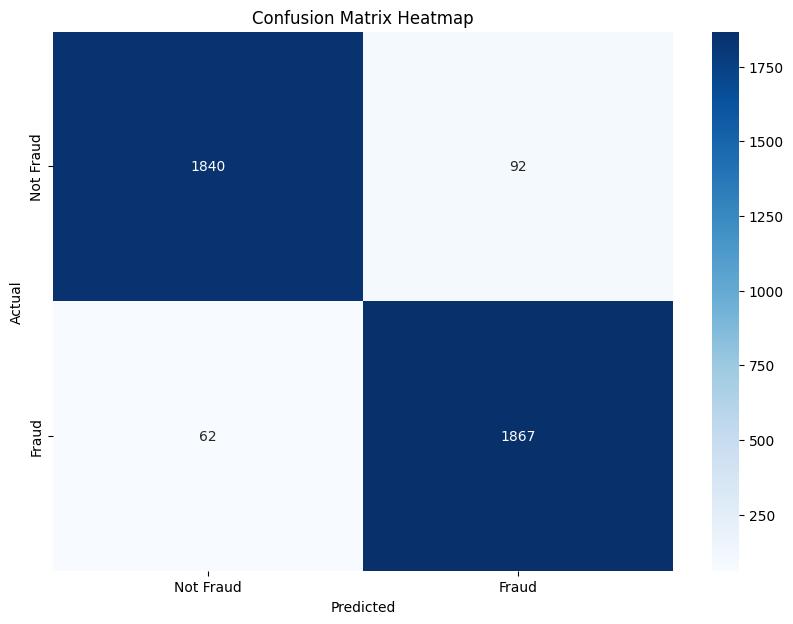

In [36]:
# Create a heatmap of the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d',cmap = 'Blues', xticklabels=['Not Fraud', 'Fraud'], yticklabels=['Not Fraud', 'Fraud'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Heatmap')
plt.show()

In [39]:
joblib.dump(xgb_model, 'fraud_transaction_detector.pkl')

['fraud_transaction_detector.pkl']